# MSc AI – SIS6117 [Assignment 1]

# 2423119 SUMMUN Roshan

### CASE STUDY 1 – Machine Learning: Regression Models 

### Install required libraries if not already installed

In [57]:
import warnings
warnings.filterwarnings('ignore')

# !pip install pandas numpy matplotlib seaborn scikit-learn

### Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

pd.set_option('display.max_columns', None) # display all columns in DataFrame output


### Load Data into DataFrame

In [59]:
df = pd.read_csv('Top50clubs.csv')
print("Dataset Shape:", df.shape)


Dataset Shape: (50, 4)


In [60]:
df

,Academy,Operating Costs,First Team,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis:

Basic Statistics:
             Academy  Operating Costs     First Team         Profit
count      50.000000        50.000000      50.000000      50.000000
mean    73721.615600    121344.639600  211025.097800  112012.639200
std     45902.256482     28017.802755  122290.310726   40306.180338
min         0.000000     51283.140000       0.000000   14681.400000
25%     39936.370000    103730.875000  129300.132500   90138.902500
50%     73051.080000    122699.795000  212716.240000  107978.190000
75%    101602.800000    144842.180000  299469.085000  139765.977500
max    165349.200000    182645.560000  471784.100000  192261.830000

Checking for missing values:
Academy            0
Operating Costs    0
First Team         0
Profit             0
dtype: int64


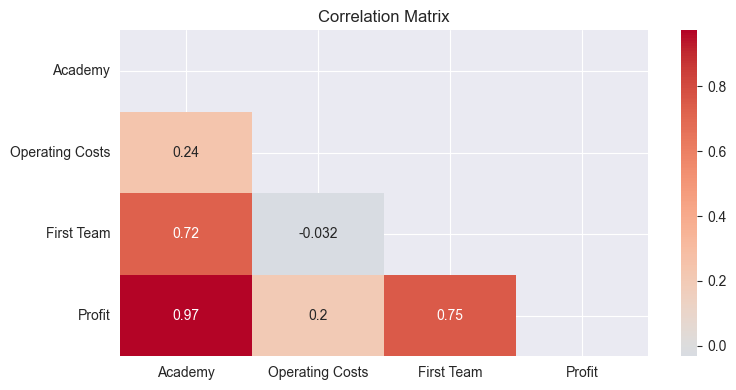

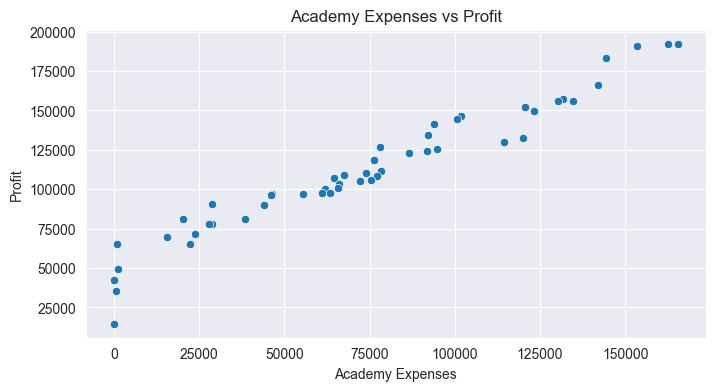

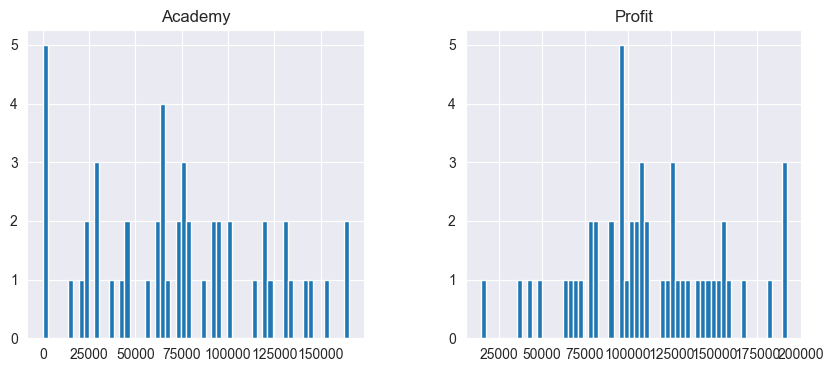

In [61]:
# Exploratory Data Analysis
def perform_eda(df):
    print("\nBasic Statistics:")
    print(df.describe())
    
    print("\nChecking for missing values:")
    print(df.isnull().sum())
    
    # Correlation matrix
    plt.figure(figsize=(8, 4))
    matrix = np.triu(df.corr())
    sns.heatmap(df.corr(), annot = True, center= 0, cmap= 'coolwarm', mask=matrix)    
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Scatter plot: Academy vs Profit
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x='Academy', y='Profit')
    plt.title('Academy Expenses vs Profit')
    plt.xlabel('Academy Expenses')
    plt.ylabel('Profit')
    plt.show()
    
    # print histograms for Academy and Profit
    df.hist(column=['Academy', 'Profit'], bins=60, figsize=(10, 4))
    plt.show()
    
    
# Perform analysis
print("Exploratory Data Analysis:")
perform_eda(df)

In [62]:
# 0 values in Academy
print("\n0 values in Academy:", df[df['Academy'] == 0].shape[0])


0 values in Academy: 2


### Findings:
- Dataset contains 50 samples and 4 columns
- Strong positive correlation between Academy and Profit (0.97)
- Linear relationship between Academy expenses and Profit
- Profit and Academy is normally distributed (ignoring outliers)
- No missing values in the dataset
- There are 2 zero values in Academy (outliers)

### ------------------------------------------------------------------------------------------------
##                                          Question 1
### ------------------------------------------------------------------------------------------------
### Data Preprocessing, Splitting, and Scaling


### A. Remove 0 values in Academy (outliers)
   - 0 values in Academy are not meaningful
   - Removing them prevents bias in model training

In [63]:
# Remove 0 values in Academy
df = df[df['Academy'] != 0]

# size of X after removing 0 values
 
print("Size of X after removing 0 values:", df.shape)

# 1. Extract only Academy and Profit
# - .values converts to numpy array for better performance
X = df[['Academy']].values  # feature
y = df['Profit'].values     # target


Size of X after removing 0 values: (48, 4)


### B. Split the dataset into training and testing sets before scaling to prevent data leakage
### Because n=48 (after removing 0s):
   - Splitting 80:20 (38 train / 10 test)
      - Assigning more examples for training the model to be exposed to more types of hidden patterns in the data & possibly learn a better representation. 
      - This is especially important when the dataset is small.
    
   - In performance evaluation (Q5), Will perform k-fold CV, k=5 because:
      - Training on 38 samples each time (80%)
      - Validating on 10 samples each time (20%)
        - More stable performance estimates by averaging over the folds
        - Reduces variance in performance estimates


In [64]:
# 2. Split the dataset first (80:20 ratio)
# - Split before scaling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
    

Training set shape: (38, 1)
Testing set shape: (10, 1)


### C. Standardize (Scale) Features and Target Variables
   - It ensures that features are on the same scale
   - Prevents features with larger scales from dominating the model
   - We will scale features and target separately
   - Standardization is not required for Decision Trees
     - Decision Trees are not sensitive to feature scaling


In [65]:
# 3. Create scalers
# - StandardScaler standardizes features by removing mean and scaling to unit variance
# - Separate scalers for X and y to scale them independently
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# 4. Scale the features (X)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# 5. Scale the target (y)
# - reshape(-1, 1) converts 1D to 2D array required by StandardScaler
# - flatten() converts back to 1D array
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

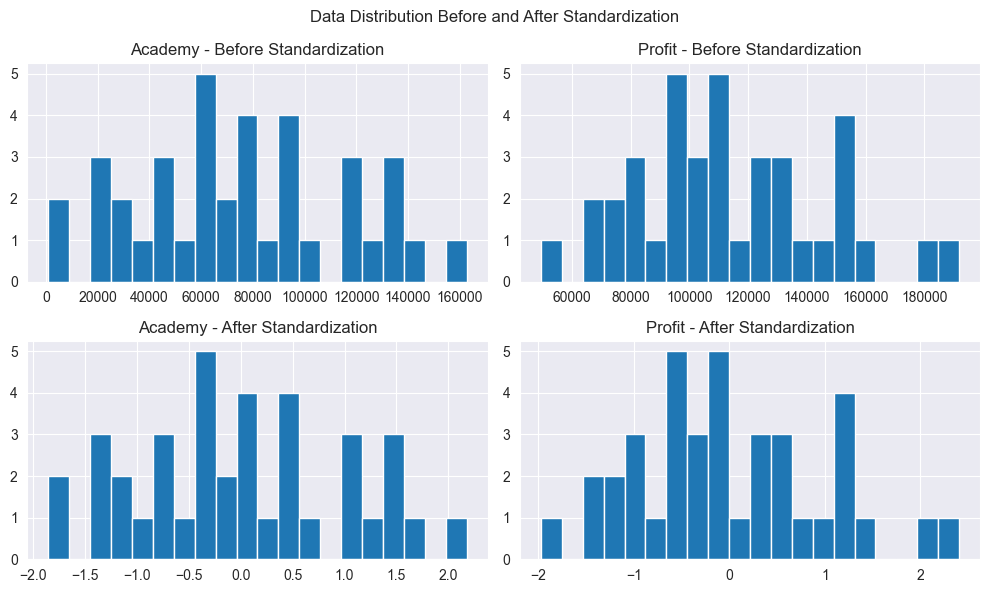

In [66]:
# Create a figure with two rows
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Data Distribution Before and After Standardization')

# Before standardization
ax1[0].hist(X_train, bins=20)
ax1[0].set_title('Academy - Before Standardization')
ax1[1].hist(y_train, bins=20)
ax1[1].set_title('Profit - Before Standardization')

# After standardization
ax2[0].hist(X_train_scaled, bins=20)
ax2[0].set_title('Academy - After Standardization')
ax2[1].hist(y_train_scaled, bins=20)
ax2[1].set_title('Profit - After Standardization')

plt.tight_layout()
plt.show()

### ------------------------------------------------------------------------------------------------
## Question 2
### ------------------------------------------------------------------------------------------------

###  A. Train Linear Regression Model on Scaled Data

In [67]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

###  B. Train Polynomial Regression Model (degree=3) on Scaled Data
   - include_bias=False to remove bias term 

In [68]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

pr_model = LinearRegression()
pr_model.fit(X_train_poly, y_train_scaled)

LinearRegression()

###  C. Train Decision Tree Regression Model

In [69]:
dt_model = DecisionTreeRegressor(random_state=40)
dt_model.fit(X_train, y_train) # no scaling required for Decision Trees because they are insensitive

DecisionTreeRegressor(random_state=40)

### ------------------------------------------------------------------------------------------------
## Question 3
### ------------------------------------------------------------------------------------------------
### Make Predictions


In [70]:
# 1. Linear Regression Predictions
lr_pred = lr_model.predict(X_test_scaled)

# 2. Polynomial Regression Predictions
pr_pred = pr_model.predict(X_test_poly)

# 3. Decision Tree Predictions
dt_pred = dt_model.predict(X_test)

### Compare the predictions

In [78]:
predictions = pd.DataFrame({
    'X': X_test.flatten(),
    'y': scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten(),
    'ŷ (Linear)': scaler_y.inverse_transform(lr_pred.reshape(-1, 1)).flatten().round(1),
    'ŷ (Polynomial)': scaler_y.inverse_transform(pr_pred.reshape(-1, 1)).flatten().round(1),
    'ŷ (Decision T)': dt_pred.round(1),
})

print("Predictions:")
predictions


Predictions:


,X,y,ŷ (Linear),ŷ (Polynomial),ŷ (Decision T)
0,542.05,35673.41,54521.2,56091.2,64926.1
1,78013.11,126992.93,115784.1,114187.2,111313.0
2,28663.76,90708.19,76759.4,78309.9,78239.9
3,15505.73,69758.98,66354.2,68244.3,81229.1
4,165349.20,192261.83,184848.2,195160.0,191792.1
5,142107.34,166187.94,166468.9,169094.0,182902.0
6,75328.87,105733.54,113661.5,112208.2,118474.0
7,100671.96,144259.40,133702.4,131590.4,146122.0
8,153441.51,191050.39,175431.8,181255.4,182902.0
9,66051.52,103282.38,106325.1,105450.1,101004.6


### ------------------------------------------------------------------------------------------------
## Question 4
### ------------------------------------------------------------------------------------------------
### Plot the training data, test set and the models

Note: We will unscale the data for plotting to get the original values

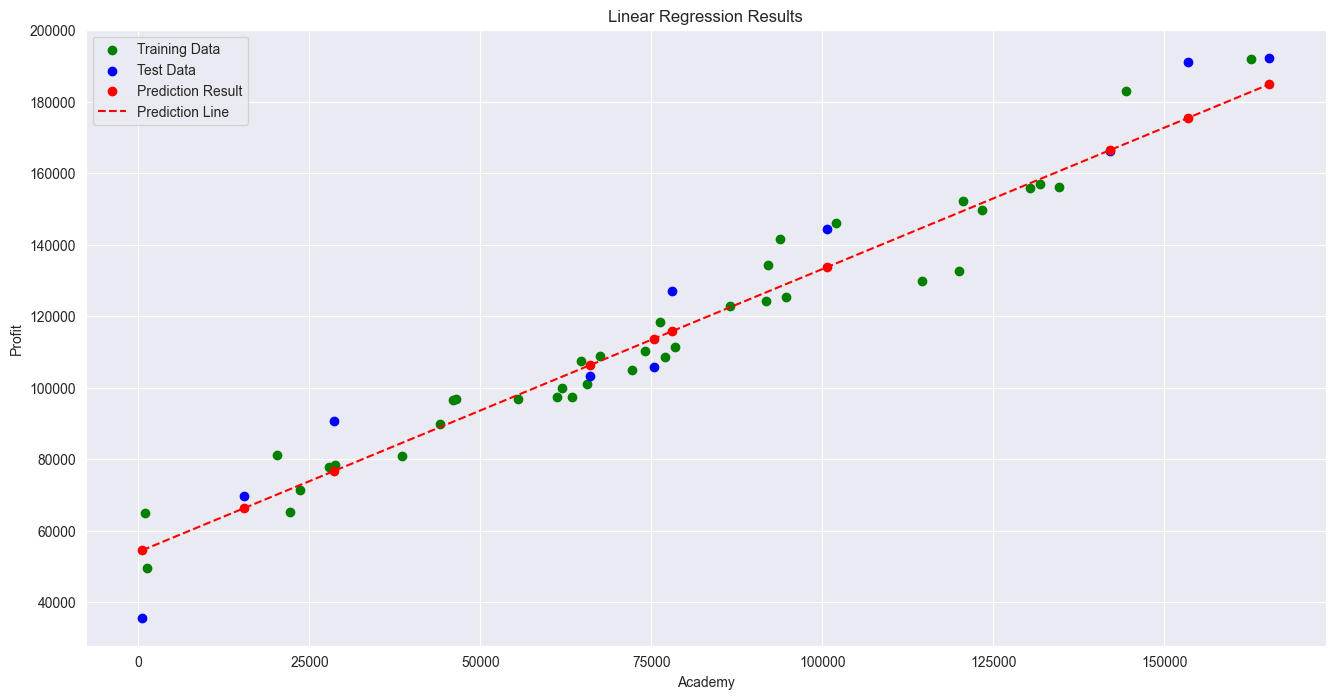

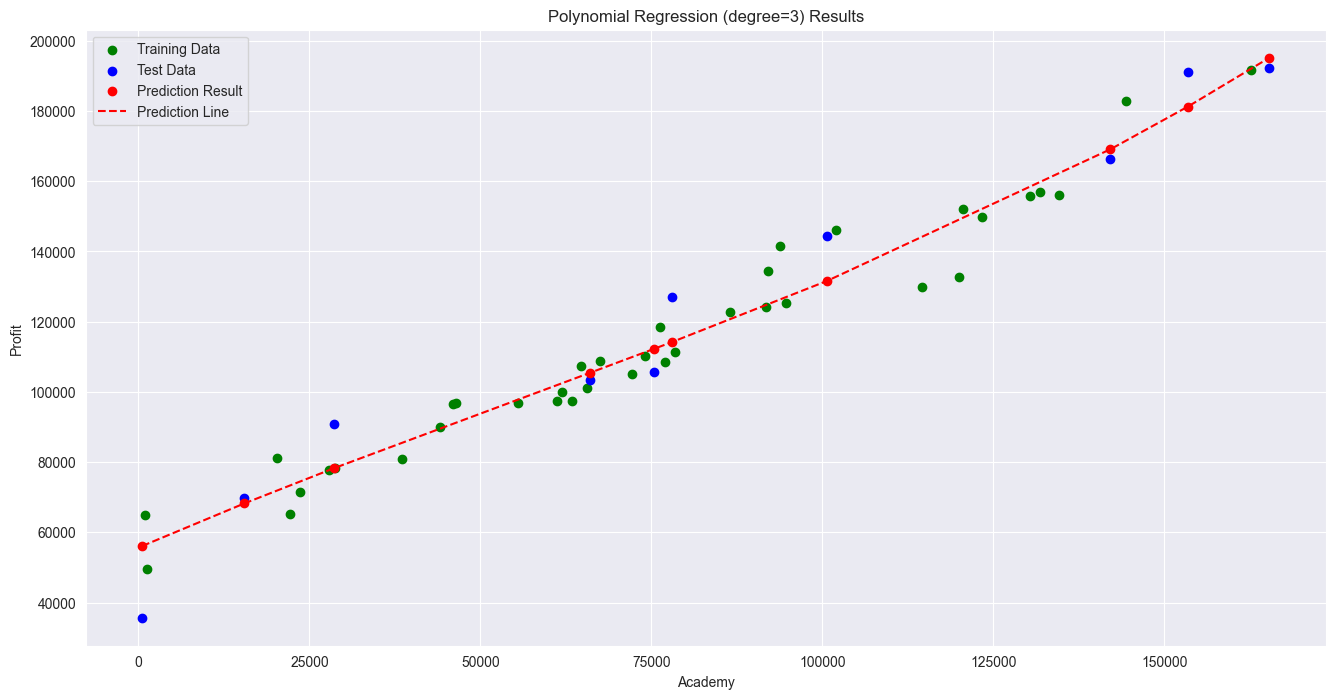

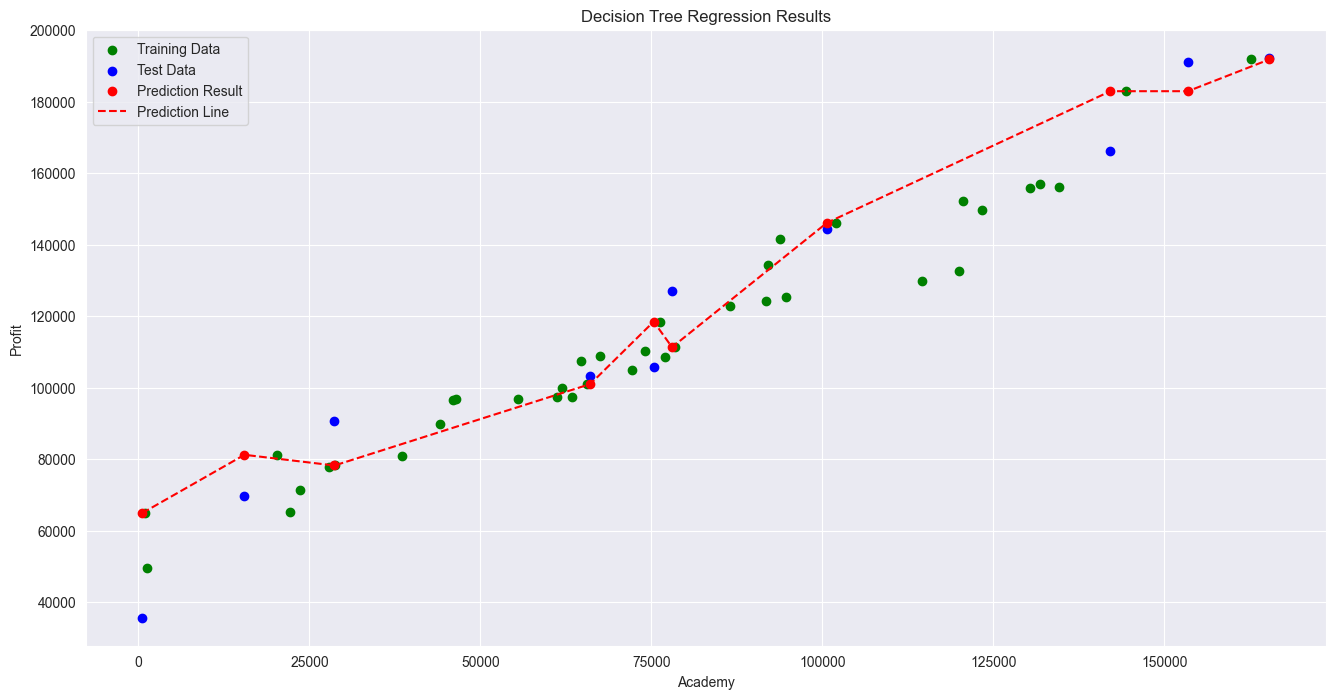

In [72]:
def plot_model_results(X_train, y_train, X_test, y_test, y_pred, model_name):
    """
    Plots the training data, test data, and prediction results for a regression model.

    Parameters:
    - X_train: Training feature data
    - y_train: Training target data
    - X_test: Test feature data
    - y_test: Test target data
    - y_pred: Predicted target values from the model
    - model_name: Name of the regression model (string)
    """
    
    # Unscale the data for plotting
    if model_name != 'Decision Tree Regression': # Decision Trees are not scaled
        X_train = scaler_X.inverse_transform(X_train)
        X_test = scaler_X.inverse_transform(X_test)
        y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
        y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    
    plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train, color='green', label='Training Data')
    plt.scatter(X_test, y_test, color='blue', label='Test Data')
    plt.scatter(X_test, y_pred, color='red', label='Prediction Result')

    # Sort X_test and corresponding predictions for plotting
    sorted_indices = np.argsort(X_test.flatten())
    X_test_sorted = X_test.flatten()[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Plot the prediction line as a red dotted line
    plt.plot(X_test_sorted, y_pred_sorted, color='red', linestyle='--', label='Prediction Line')

    plt.title(f'{model_name} Results')
    plt.xlabel('Academy')
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

# Call the function for each model

# Linear Regression
plot_model_results(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, lr_pred, 'Linear Regression')

# Polynomial Regression
plot_model_results(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, pr_pred, 'Polynomial Regression (degree=3)')

# Decision Tree Regression
plot_model_results(X_train, y_train, X_test, y_test, dt_pred, 'Decision Tree Regression')


### ------------------------------------------------------------------------------------------------
## Question 5
### ------------------------------------------------------------------------------------------------
### A. Performance Evaluation using R²


In [73]:
# Calculate R² scores
lr_r2 = r2_score(y_test_scaled, lr_pred)
pr_r2 = r2_score(y_test_scaled, pr_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Print header
print("-" * 40)
print(f"{'Model':<25} {'R² Score':>12}")
print("-" * 40)

# Print model performances
print(f"{'Linear Regression':<25} {lr_r2:>12.4f}")
print(f"{'Polynomial Regression':<25} {pr_r2:>12.4f}")
print(f"{'Decision Tree':<25} {dt_r2:>12.4f}")
print("-" * 40)

----------------------------------------
Model                         R² Score
----------------------------------------
Linear Regression               0.9512
Polynomial Regression           0.9559
Decision Tree                   0.9204
----------------------------------------


### B. Stability Analysis of Models using Cross-Validation Scores (5-fold)

Evaluating models using 5-fold cross validation...

Linear Regression - Cross Validation Results:
----------------------------------------
R² Score: 0.9464 ± 0.0388
Individual Fold Scores: ['0.9516', '0.9395', '0.9710', '0.9565', '0.9132']

Polynomial Regression - Cross Validation Results:
----------------------------------------
R² Score: 0.9448 ± 0.0404
Individual Fold Scores: ['0.9485', '0.9372', '0.9613', '0.9668', '0.9100']

Decision Tree - Cross Validation Results:
----------------------------------------
R² Score: 0.8895 ± 0.1152
Individual Fold Scores: ['0.8372', '0.8634', '0.9480', '0.9687', '0.8304']


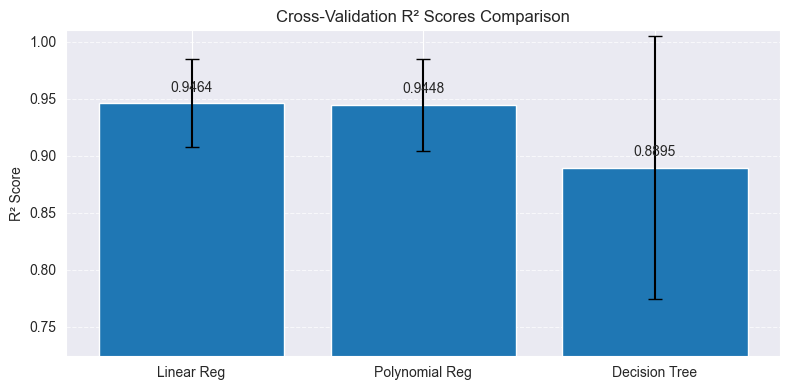

In [74]:
# Set up 5-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, X_poly=None, model_name="Model"):
    """Evaluate model using 5-fold cross validation"""
    # Use polynomial features if provided
    X_eval = X_poly if X_poly is not None else X
    
    # Get cross validation R² scores
    cv_scores = cross_val_score(model, X_eval, y, cv=kf, scoring='r2')
    
    # Print results
    print(f"\n{model_name} - Cross Validation Results:")
    print("-" * 40)
    print(f"R² Score: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
    print(f"Individual Fold Scores: {[f'{score:.4f}' for score in cv_scores]}")
    
    return cv_scores

# Evaluate all models
print("Evaluating models using 5-fold cross validation...")

# scale X 
X_scaled = scaler_X.fit_transform(X)

# 1. Linear Regression
lr_scores = evaluate_model(lr_model, X_scaled, model_name="Linear Regression")

# 2. Polynomial Regression
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
pr_scores = evaluate_model(pr_model, X_scaled, X_poly, model_name="Polynomial Regression")

# 3. Decision Tree
dt_scores = evaluate_model(dt_model, X, model_name="Decision Tree")

# Visualize results
plt.figure(figsize=(8, 4))
models = ['Linear Reg', 'Polynomial Reg', 'Decision Tree']
cv_means = [scores.mean() for scores in [lr_scores, pr_scores, dt_scores]]
cv_stds = [scores.std() * 2 for scores in [lr_scores, pr_scores, dt_scores]]

# Create bar plot
plt.bar(models, cv_means, yerr=cv_stds, capsize=5)
plt.title('Cross-Validation R² Scores Comparison')
plt.ylabel('R² Score')
plt.ylim(min(cv_means) - max(cv_stds) - 0.05, 1.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(cv_means):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()


# C. Model Performance Analysis

### R² Scores on Test Set
- Linear Regression: 0.9512
- Polynomial Regression: 0.9559
- Decision Tree: 0.9204

### Model Performance
- In EDA, we observed a a strong linear relationship between Academy expenses and Profit (0.97)
- Polynomial Regression shows the highest R² score (0.9559), followed closely by Linear Regression (0.9512) and Decision Tree (0.9204) by ~3 points
- All three models demonstrate excellent performance with R² scores above 0.92, indicating they explain more than 92% of the variance in profit


### Stability Analysis using Cross-Validation
- Linear : 0.9464 ± 0.0388
- Polynomial : 0.9448 ± 0.0404
- Decision Tree : 0.8895 ± 0.1152
- Cross-validation results show that Linear Regression outperforms Polynomial Regression and Decision Tree
   - It has the highest mean R² score (0.9464) and the lowest standard deviation (0.0388)
      - Indicates Linear Regression is more stable and consistent in performance across different folds
- Decision Tree has lowest mean R² score (0.8895) the highest standard deviation (0.1152), indicating overfitting and poor generalization

### Recommendations

1. **Choose Linear Regression because:**
   - Highest mean performance (0.9464 for Cross-Validation)
      - Indicates better generalization to unseen data
   - Lower standard deviation (0.0388 for Cross-Validation)
      - Indicates more consistent performance across different folds
   - Lower risk of overfitting vs Decision Tree (0.1152) and Polynomial Regression (0.0404)
   - Simpler model
   - Best stability to other models

2. **Data Collection:**
   - Gather more data. A larger dataset can improve model performance and generalization
   - Include additional relevant features

3. **Performance:**
   - Test set performance metrics beyond R² (e.g., RMSE, MAE)